In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,GridSearchCV,train_test_split
import warnings
warnings.simplefilter(action='ignore')
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-20,20),math.sin(2*math.pi/n*x)*r+np.random.normal(-20,20)) for x in range(1,n+1)]

In [3]:
d1=PointsInCircum(400,900)
d2=PointsInCircum(250,600)
d3=PointsInCircum(90,200)
noise=[(np.random.randint(-500,500),np.random.randint(-500,500)) for i in range(300)]
d=d1+d2+d3+noise

In [4]:
df=pd.DataFrame(d)
df

,0,1
0,367.655420,-28.355485
1,369.864202,-4.421931
2,391.663476,1.093222
3,408.879900,-1.392981
4,383.202217,6.550341
...,...,...
1995,-277.000000,398.000000
1996,232.000000,-293.000000
1997,-287.000000,121.000000
1998,496.000000,196.000000


In [5]:
df2=df.copy()

In [6]:
df2.iloc[:,0:]=StandardScaler().fit_transform(df2.iloc[:,0:])

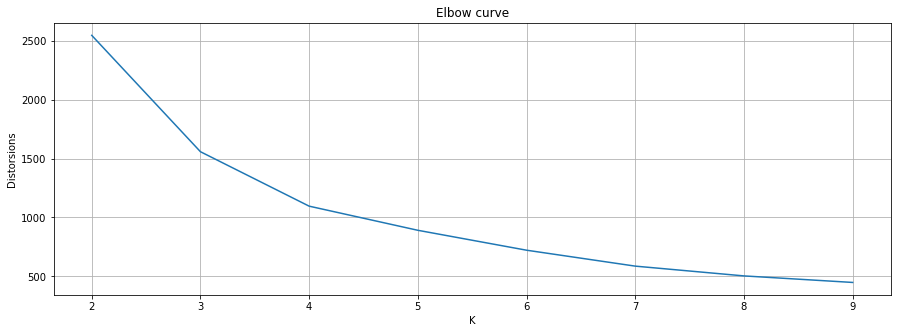

In [7]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [8]:
range_n_clusters = range(2,10)
silhouette_avg_n_clusters = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df)

    silhouette_avg = silhouette_score(df2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3459732826992119
For n_clusters = 3 The average silhouette_score is : 0.3807071122922468
For n_clusters = 4 The average silhouette_score is : 0.3757900142544886
For n_clusters = 5 The average silhouette_score is : 0.3509220061037094
For n_clusters = 6 The average silhouette_score is : 0.39313028411052414
For n_clusters = 7 The average silhouette_score is : 0.3948839223691364
For n_clusters = 8 The average silhouette_score is : 0.38530469082497876
For n_clusters = 9 The average silhouette_score is : 0.37181230281992134


In [27]:
km=KMeans(n_clusters=7)

In [28]:
km.fit(df)

KMeans(n_clusters=7)

In [29]:
cl=km.predict(df)

In [30]:
df['Cluster_KMeans']=cl
df
df2['Cluster_KMeans']=cl
df2

,0,1,Cluster_KMeans
0,1.612146,-0.039903,6
1,1.621348,0.057661,6
2,1.712168,0.080144,6
3,1.783894,0.070009,6
4,1.676917,0.102390,6
...,...,...,...
1995,-1.073591,1.698121,5
1996,1.046984,-1.118717,4
1997,-1.115253,0.568940,1
1998,2.146850,0.874675,6


In [31]:
colours=['orange','pink','red','black','blue','yellow','green']

In [13]:
dbsc=DBSCAN()

In [14]:
dbscandef=dbsc.fit_predict(df)

In [15]:
df['Cluster_DBSCANdef']=dbscandef

In [16]:
colours=['orange','pink','red','black','blue','yellow','green']

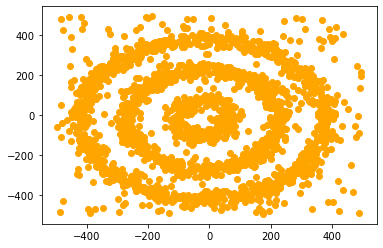

In [17]:
for i in range(len(df['Cluster_DBSCANdef'].unique())):
    plt.scatter(df.iloc[:,0][dbscandef==df['Cluster_DBSCANdef'].unique()[i]],df.iloc[:,1][dbscandef==df['Cluster_DBSCANdef'].unique()[i]],c=colours[i])

In [18]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

In [19]:
distances

array([[ 0.        ,  6.99746387],
       [ 0.        ,  3.05476548],
       [ 0.        , 10.04627686],
       ...,
       [ 0.        , 14.14213562],
       [ 0.        , 22.        ],
       [ 0.        , 11.39222158]])

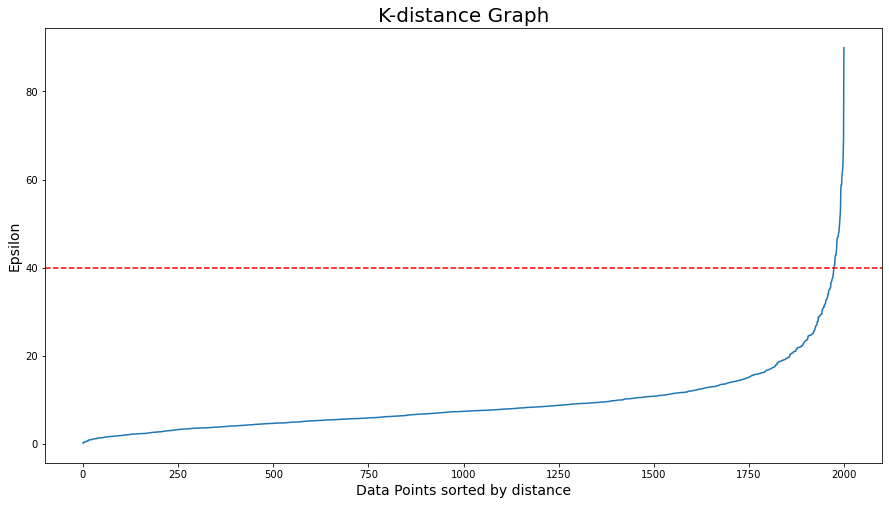

In [20]:
distances=distances[:,1]
distances = np.sort(distances, axis=0)
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=40, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [21]:
eps=40
for min_samples in list(range(5,16)):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 40 | min_samples=  5 | obtained clustering:  [(1, 75), (2, 1695), (3, 224), (4, 6)]
eps= 40 | min_samples=  6 | obtained clustering:  [(1, 86), (2, 1690), (3, 224)]
eps= 40 | min_samples=  7 | obtained clustering:  [(1, 90), (2, 1686), (3, 224)]
eps= 40 | min_samples=  8 | obtained clustering:  [(1, 90), (2, 1686), (3, 224)]
eps= 40 | min_samples=  9 | obtained clustering:  [(1, 92), (2, 1023), (3, 661), (4, 224)]
eps= 40 | min_samples=  10 | obtained clustering:  [(1, 93), (2, 1022), (3, 661), (4, 224)]
eps= 40 | min_samples=  11 | obtained clustering:  [(1, 95), (2, 1019), (3, 662), (4, 224)]
eps= 40 | min_samples=  12 | obtained clustering:  [(1, 98), (2, 1016), (3, 662), (4, 224)]
eps= 40 | min_samples=  13 | obtained clustering:  [(1, 101), (2, 1013), (3, 662), (4, 224)]
eps= 40 | min_samples=  14 | obtained clustering:  [(1, 102), (2, 1012), (3, 662), (4, 224)]
eps= 40 | min_samples=  15 | obtained clustering:  [(1, 104), (2, 1011), (3, 661), (4, 224)]


In [22]:
dbscan=DBSCAN(eps = 40, min_samples = 9)
dbscan_pred=dbscan.fit_predict(df)

In [23]:
df['Cluster_DBSCAN']=dbscan_pred
df

,0,1,Cluster_KMeans,Cluster_DBSCANdef,Cluster_DBSCAN
0,367.655420,-28.355485,1,-1,0
1,369.864202,-4.421931,1,-1,0
2,391.663476,1.093222,1,-1,0
3,408.879900,-1.392981,1,-1,0
4,383.202217,6.550341,1,-1,0
...,...,...,...,...,...
1995,-277.000000,398.000000,3,-1,-1
1996,232.000000,-293.000000,4,-1,0
1997,-287.000000,121.000000,0,-1,1
1998,496.000000,196.000000,1,-1,-1


In [24]:
df['Cluster_DBSCAN'].unique()

array([ 0,  1,  2, -1], dtype=int64)

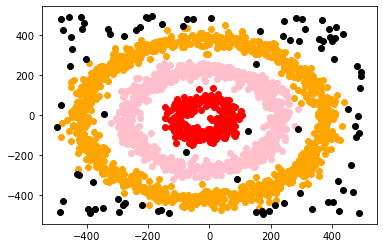

In [25]:
for i in range(len(df['Cluster_DBSCAN'].unique())):
    plt.scatter(df.iloc[:,0][dbscan_pred==df['Cluster_DBSCAN'].unique()[i]],df.iloc[:,1][dbscan_pred==df['Cluster_DBSCAN'].unique()[i]],c=colours[i])